<a href="https://colab.research.google.com/github/dipakpatil2001/Regression-Project-Retail_Sales_Prediction/blob/main/Regression_Project_Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

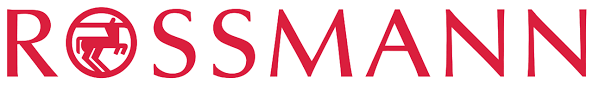

## **Project Name**   - Retail Sales Prediction on Rossmann Store.



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**            - Dipak Balram Patil

# **Project Summary -**

To build a sales price prediction model for Rossmann Stores, we will undertake the following steps:
1. Data Integration:

 Combine the Rossmann Stores Data with the Store Data to create a comprehensive dataset that includes store attributes along with sales data.
2. Data Cleaning:

 Handle missing values in the Store Data, either by imputation or removal, depending on the nature of the data.
 Ensure data types are appropriate for each feature, converting dates and categoricals as needed.
3. Feature Engineering:

  Derive new features that may have predictive power, such as time since competition opened, time since a store was remodeled, and indicators for promotions.
Encode categorical variables using one-hot encoding or label encoding.
4. Exploratory Data Analysis (EDA)
:

 Analyze sales trends over time to understand seasonality and other patterns.
Investigate the relationship between sales and other variables, such as promotions, store type, and competition.
5. Model Selection
:

 Choose appropriate machine learning models for regression, such as linear regression, random forest, or gradient boosting machines.
Consider time series models if the temporal aspect is significant.
6. Model Training and Validation
:

  Split the data into training and validation sets to evaluate model performance.
Use cross-validation to ensure the model's robustness.
7. Model Optimization
:

 Tune hyperparameters to improve model performance.
Feature selection to identify the most important predictors.
8. Model Evaluation:

 Assess the model using appropriate metrics, such as RMSE (Root Mean Square Error) for continuous sales predictions.

Each step will be executed with careful consideration of the data's characteristics and the business context of Rossmann Stores. The goal is to create a reliable and accurate model that can inform decision-making and strategy for the company's sales initiatives.


# **GitHub Link -**

Provide your GitHub Link here. https://github.com/dipakpatil2001/Regression-Project-Retail_Sales_Prediction

# **Problem Statement**


To develope the Machine Learning Regression Model to predicts the daily sales for up to six weeks in advance for 1115 Rossmann Stores across Europe. The model should take into account various factors that influence the sales such as promotions, competition, holidays, seasonality, locality, etc.

Our goal is to help Rossmann Store management make informed sales prediction so that they can manage various factors such as inventory management, staffinan g, and promotional strategies which will ultimately lead to increase in sales and profitability for the business.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

There have been given two datasets:
1. Rossmann Store Data.CSV
2. Store.CSV

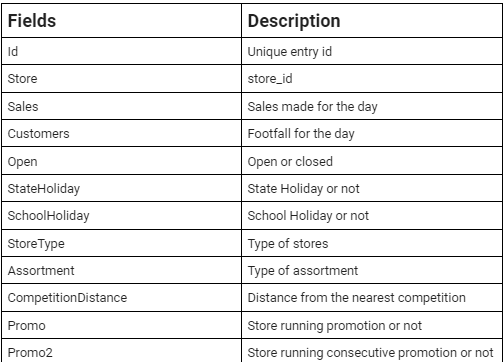

**These variables provide a comprehensive view of the sales data and store characteristics within the Rossmann dataset.**

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from datetime import datetime as dt

# To display all the columns in Dataframe
pd.set_option('display.max_columns', None)

# Import Data Visualisation Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as pl
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Set the plot style and display options
plt.style.use('ggplot')
sns.set()

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble

# Import and Ignore warnings for better code readability,
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [3]:
# Load the Rossmann Stores Data
rossmann_data = pd.read_csv('/content/drive/MyDrive/CD/Data science /Projects and all/Rossmann Stores Data.csv')
# Load the Store Data
store_data = pd.read_csv('/content/drive/MyDrive/CD/Data science /Projects and all/store.csv')

### Dataset First View

In [4]:
# Dataset First Look
rossmann_data.head(3)    #Rossmann Stores Data first 3 rows

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


In [5]:
rossmann_data.tail(3)    #Rossmann Stores Data last 3 rows

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [6]:
store_data.head(3)    #Store Data first 3 rows

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [7]:
store_data.tail(3)    #Store Data last 3 rows

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
# Count the number of rows and columns for both datasets
rossmann_shape = rossmann_data.shape
store_shape = store_data.shape

# Display the shape of the datasets
print('Rossmann Stores Data shape:', rossmann_shape)
print('Store Data shape:', store_shape)

Rossmann Stores Data shape: (1017209, 9)
Store Data shape: (1115, 10)


**The Rossmann Stores Data contains 1,017,209 rows and 9 columns.**

**The Store Data comprises 1,115 rows and 10 columns.**

### Dataset Information

In [9]:
# Dataset Info
print('Rossmann Stores Data Info:')
print(rossmann_data.info())
print('\nStore Data Info:')
print(store_data.info())

Rossmann Stores Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None

Store Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType   

In [10]:
rossmann_data.describe()    #summary statistics for rossmann data

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [11]:
store_data.describe()    #summary statistics for store data

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
rossmann_duplicates = rossmann_data.duplicated().sum()
store_duplicates = store_data.duplicated().sum()

# Display the number of duplicates
print('Number of duplicate rows in Rossmann Stores Data:', rossmann_duplicates)
print('Number of duplicate rows in Store Data:', store_duplicates)

Number of duplicate rows in Rossmann Stores Data: 0
Number of duplicate rows in Store Data: 0


**There are no duplicate rows in either the Rossmann Stores Data or the Store Data.**

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
rossmann_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [14]:
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

**The Rossmann Stores Data does not have any missing values across its columns. However, the Store Data has some missing values**

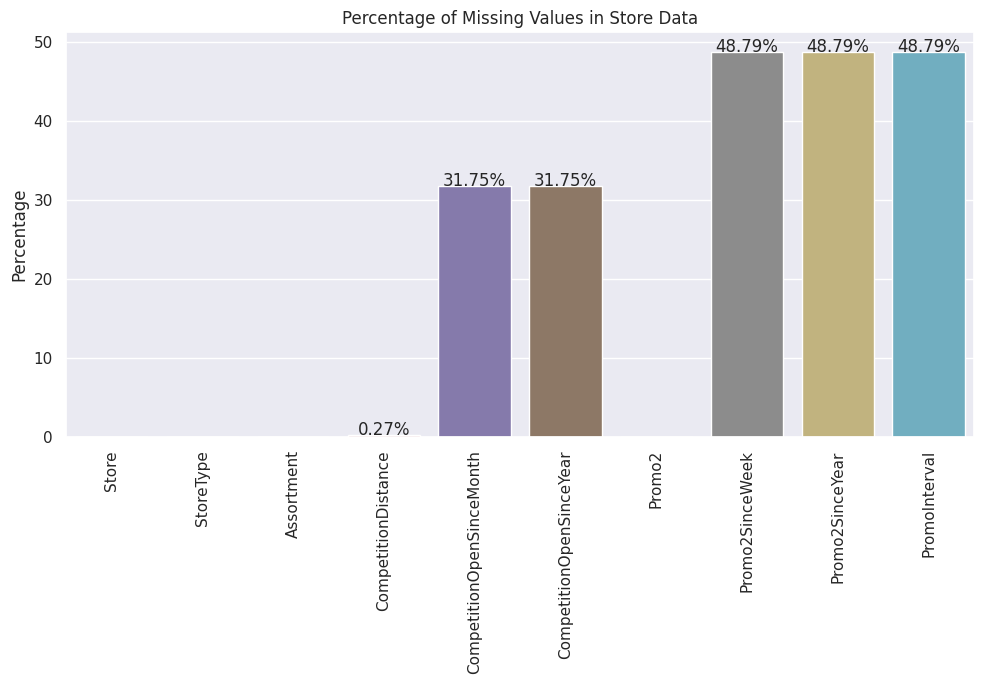

In [15]:
# Visualizing the missing values
# Calculate the percentage of missing values for each column
store_missing_percentage = store_data.isnull().mean() * 100

# Create a bar plot for the missing values percentage
plt.figure(figsize=(10, 7))
sns.barplot(x=store_missing_percentage.index, y=store_missing_percentage.values)
plt.title('Percentage of Missing Values in Store Data')
plt.ylabel('Percentage')
plt.xticks(rotation=90)

# Adding annotations on top of the bars
for index, value in enumerate(store_missing_percentage.values):
    if value > 0: # Only annotate bars with missing values
        plt.text(index, value, f'{value:.2f}%', ha='center')
plt.tight_layout()
plt.show()

### What did you know about your dataset?

Based on the analysis conducted so far on the Rossmann Stores Data and the Store Data, here's a summary of key insights:

**Data Completeness**
 * The Rossmann Stores Data is complete with no missing values. The Store Data, however, has missing values in several columns related to competition and promotions.

**Duplicates:**
 * There are no duplicate rows in either dataset, indicating that each entry is unique.

**Missing Values Visualization:**
 * The annotated bar plot for the Store Data indicates that some columns have a significant percentage of missing values, particularly "CompetitionOpenSinceMonth" and "CompetitionOpenSinceYear".

These insights provide a foundational understanding of the datasets' structure and integrity, which is crucial for any further analysis or predictive modeling.

## ***2. Understanding Your Variables***

In [16]:
# Dataset rows and columns
print('Rossmann Stores Data shape:', rossmann_shape)
print('Store Data shape:', store_shape)

Rossmann Stores Data shape: (1017209, 9)
Store Data shape: (1115, 10)


In [17]:
# Dataset columns
print("Number of columns in Rossmann data:",len(rossmann_data.columns))
print("column names in Rossmann data:",list(rossmann_data.columns))
print("-----------------------------------------------------------")
print("Number of columns in Store data:",len(store_data.columns))
print("column names in Store data:",list(store_data.columns))

Number of columns in Rossmann data: 9
column names in Rossmann data: ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
-----------------------------------------------------------
Number of columns in Store data: 10
column names in Store data: ['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [18]:
# Dataset describe - Rossmann data
rossmann_data.describe(include = 'all') #Summary statistics for Rossmann data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [19]:
# Dataset Describe - Store data
store_data.describe(include = 'all') #Summary statistics for Store data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


### Variables Description

The datasets contain the following variables:

**Rossmann Stores Data:**
1. Store: An identifier for each store.
2. DayOfWeek: The day of the week represented numerically.
3. Date: The date of sales data.
4. Sales: The turnover for any given day (**this is what you are predicting**).
5. Customers: The number of customers on a given day.
6. Open: An indicator for whether the store was open: 0 = closed, 1 = open.
7. Promo: Indicates whether a store is running a promo on that day.
8. StateHoliday: Indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays.
9. SchoolHoliday: Indicates if the (Store, Date) was affected by the closure of public schools.

**Store Data:**

1. Store: An identifier for each store.
2. StoreType: Differentiates between 4 different store models: a, b, c, d.
3. Assortment: Describes an assortment level: a = basic, b = extra, c = extended.
4. CompetitionDistance: Distance in meters to the nearest competitor store.
5. CompetitionOpenSinceMonth: Gives the approximate month of the time the nearest competitor was opened.
6. CompetitionOpenSinceYear: Gives the approximate year of the time the nearest competitor was opened.
7. Promo2: Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating.
8. Promo2SinceWeek: Describes the calendar week when the store started participating in Promo2.
9. Promo2SinceYear: Describes the year when the store started participating in Promo2.
10. PromoInterval: Describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g., "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store.

**These variables provide a comprehensive view of the sales data and store characteristics within the Rossmann dataset.**

### Check Unique Values for each variable.

In [20]:
# Check Unique Values for each variable.
print(rossmann_data.nunique())
print("-----------------------------------------")
print(store_data.nunique())

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64
-----------------------------------------
Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64


In [21]:
#Checking null values in both data set
print(rossmann_data.isnull().sum())
print("----------------------------")
print(store_data.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
----------------------------
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [22]:
# Fill null values in store data set
store_data.fillna(0, inplace=True)

# Check for any remaining null values
store_data.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

The null values have been filled with **zeros** in dataset. This approach was chosen to maintain the integrity of the data and avoid any potential bias that might be introduced by using the median.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [23]:
# Write your code to make your dataset analysis ready.
# Merge the datasets into a single dataframe using how='left'
total_df = pd.merge(rossmann_data, store_data, on='Store', how='left')
total_df.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [24]:
total_df.shape

(1017209, 18)

The datasets have now been merged using how="left", which includes all records from the Rossmann Stores Data and the matching records from the Store Data. The head of this left-joined dataframe is displayed above.

In [25]:
print("Shape of the Total dataframe: ",total_df.shape)
print(total_df.dtypes)

Shape of the Total dataframe:  (1017209, 18)
Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object


In [26]:
# Identify categorical values in columns with data type as object
obj_dtype = ['StateHoliday','StoreType','Assortment','PromoInterval']
for i in obj_dtype:
  print(i)
  print(total_df[i].unique())
  print("----------------------")

StateHoliday
['0' 'a' 'b' 'c' 0]
----------------------
StoreType
['c' 'a' 'd' 'b']
----------------------
Assortment
['a' 'c' 'b']
----------------------
PromoInterval
[0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
----------------------


In [27]:
# Convert 'Date' column to datetime format
total_df['Date'] = pd.to_datetime(total_df['Date'], format = '%Y-%m-%d')

# Convert 'StateHoliday', 'StoreType', 'Assortment', 'PromoInterval' columns to integer format
# Mapping for StateHoliday
state_holiday_map = {'a': 1, 'b': 2, 'c': 3, '0': 0}
total_df['StateHoliday'] = total_df['StateHoliday'].map(state_holiday_map)

# Mapping for StoreType
store_type_map = {'a': 1, 'b': 2, 'c': 3, 'd': 4}
total_df['StoreType'] = total_df['StoreType'].map(store_type_map)

# Mapping for Assortment
assortment_map = {'a': 1, 'b': 2, 'c': 3}
total_df['Assortment'] = total_df['Assortment'].map(assortment_map)

# Mapping for PromoInterval
promo_interval_map = {'Jan,Apr,Jul,Oct': 1, 'Feb,May,Aug,Nov': 2, 'Mar,Jun,Sept,Dec': 3}
total_df['PromoInterval'] = total_df['PromoInterval'].map(promo_interval_map)

In [28]:
total_df = total_df.fillna(0)
print(total_df.isna().sum())
print("-----------------------------------------------------------------")
print(total_df.info())

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64
-----------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64

In [29]:
total_df.head(3)    # Dataframe view after converting categorical values into numerical values

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0.0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0.0
1,2,5,2015-07-31,6064,625,1,1,0.0,1,1,1,570.0,11.0,2007.0,1,13.0,2010.0,1.0
2,3,5,2015-07-31,8314,821,1,1,0.0,1,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,1.0


### What all manipulations have you done and insights you found?

The manipulation performed involved:


Filling in any missing values in the dataframe with zeros. This ensures that the data is in a suitable format for further analysis.

The insights found from this manipulation are:

1. Converted the 'Date' column to the format 'YYYY-MM-DD'.
2. Mapped the 'PromoInterval' column to numerical values based on defined intervals. Also mapped 'StateHoliday', 'StoreType', 'Assortment' columns to integer format which were of Object Data Type.
3. Filled missing values in the dataframe with zeros.

These changes facilitate a more suitable for analysis and modeling process, as numerical data is often required for various statistical and machine learning techniques.

The dataframe has been updated with these manipulations, ensuring that the data is in a suitable format for further analysis, exploration and modeling.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

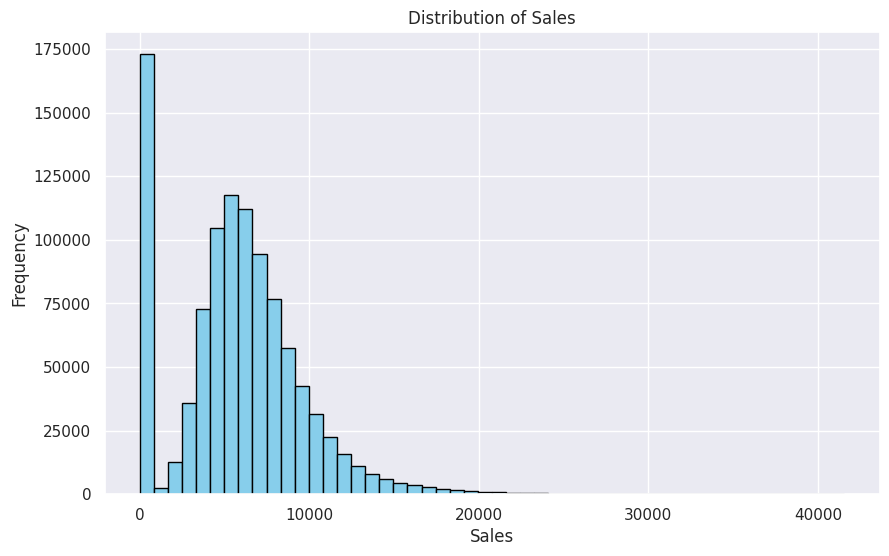

In [81]:
# Chart - 1 visualization code
# Visualize the distribution of sales
plt.figure(figsize=(10, 6))
plt.hist(total_df['Sales'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

The histogram was chosen to visualize the distribution of sales because it provides a clear representation of the frequency of different sales amounts. This allows us to understand the spread of sales values and identify any patterns or outliers in the data. The visualization helps in gaining insights into the sales performance of the stores and can aid in making informed business decisions.


##### 2. What is/are the insight(s) found from the chart?

The histogram above displays the distribution of sales across the merged dataset. It shows how frequently certain sales amounts occur, giving us an insight into the sales performance of the stores.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the visualization of the sales distribution will indeed help in creating a positive business impact. By understanding the frequency and spread of sales amounts, businesses can identify trends, outliers, and potential areas for improvement. This information can be used to optimize pricing strategies, forecast future sales, and make informed decisions to enhance overall sales performance.



#### Chart - 2

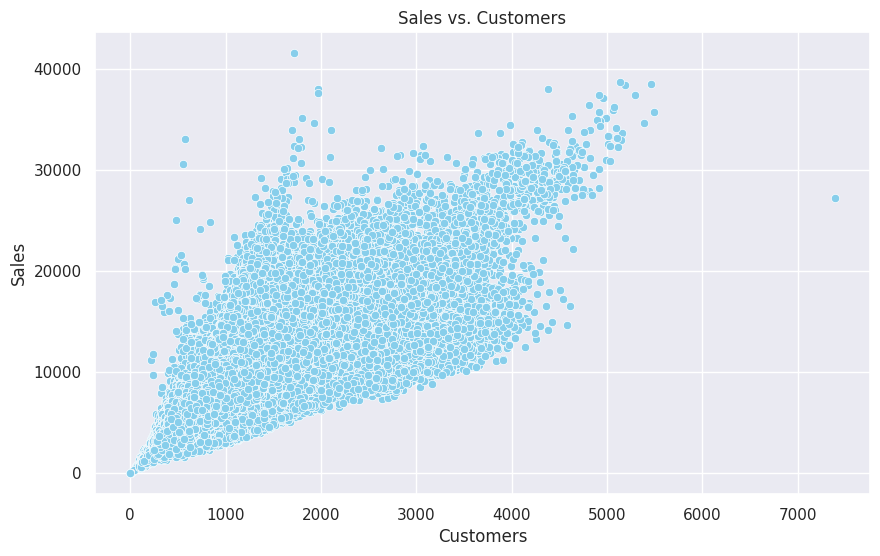

In [82]:
# Chart - 2 visualization code
# Visualize the relationship between 'Sales' and 'Customers'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=total_df, x='Customers', y='Sales', color='skyblue')
plt.title('Sales vs. Customers')
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

##### 1. Why did you pick the specific chart?

The scatterplot was chosen to visualize the relationship between the number of customers and sales because it allows for the examination of how these two variables are related. By plotting the data points for each store, we can observe any patterns or correlations between customer footfall and sales figures. This visualization helps in understanding the impact of customer traffic on sales performance.

##### 2. What is/are the insight(s) found from the chart?

The scatterplot visualizes the relationship between the number of customers and sales. It provides insight into how customer footfall impacts sales figures, allowing us to identify any patterns or correlations between these two variables. This visualization helps in understanding the impact of customer traffic on sales performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the scatterplot visualization of the relationship between the number of customers and sales will indeed help in creating a positive business impact. By understanding how customer footfall impacts sales figures, businesses can optimize staffing, inventory, and marketing strategies to align with customer traffic patterns. This can lead to improved sales performance and enhanced customer satisfaction, ultimately contributing to a positive business impact.


#### Chart - 3

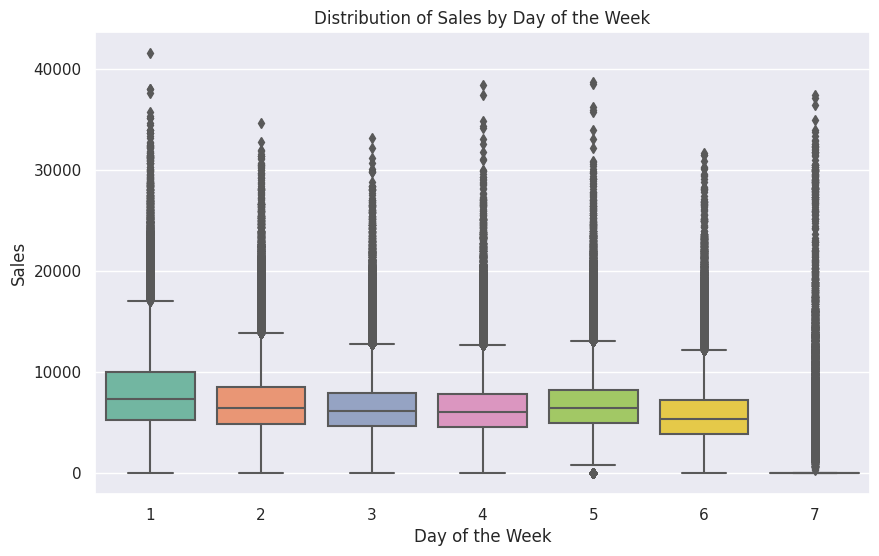

In [84]:
# Chart - 3 visualization code
# Visualize the distribution of sales by day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(data=total_df, x='DayOfWeek', y='Sales', palette='Set2')
plt.title('Distribution of Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sales')
plt.show()

##### 1. Why did you pick the specific chart?

The boxplot was chosen to visualize the distribution of sales by day of the week because it allows for a clear comparison of sales performance across different days. The boxplot provides insights into the median, quartiles, and potential outliers in sales figures for each day of the week, helping to identify any patterns or variations in sales performance based on the day.

##### 2. What is/are the insight(s) found from the chart?

The boxplot of sales by day of the week provides insights into the distribution of sales figures across different days. It helps in identifying any patterns or variations in sales performance based on the day of the week. This visualization can reveal which days tend to have higher or lower sales, allowing businesses to tailor their strategies and operations accordingly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the visualization of sales by day of the week will help in creating a positive business impact by identifying patterns and variations in sales performance based on different days. This information can be used to optimize staffing, promotions, and inventory management to align with the sales trends observed on specific days. Ultimately, this can lead to improved operational efficiency and enhanced sales performance, contributing to a positive business impact.

#### Chart - 4

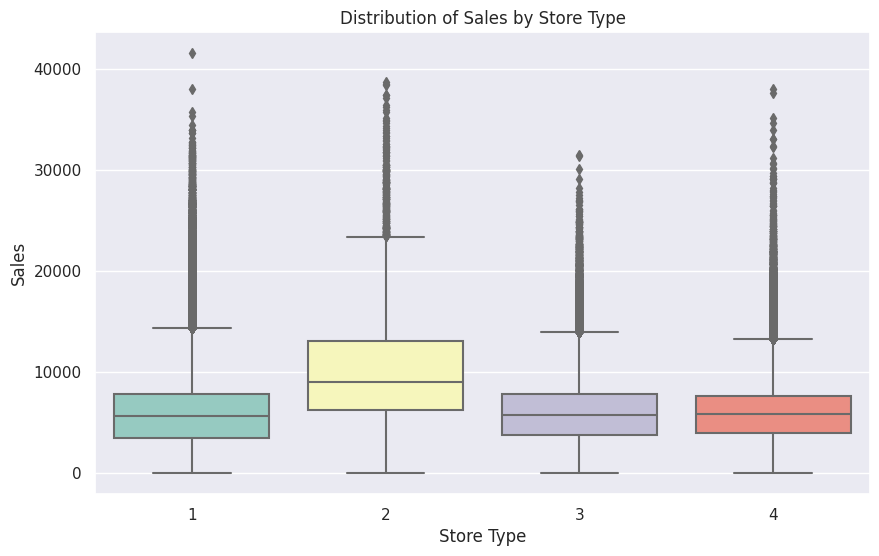

In [85]:
# Chart - 4 visualization code
# Visualize the distribution of sales by store type
plt.figure(figsize=(10, 6))
sns.boxplot(data=total_df, x='StoreType', y='Sales', palette='Set3')
plt.title('Distribution of Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()

##### 1. Why did you pick the specific chart?

The boxplot was chosen to visualize the distribution of sales by store type because it allows for a clear comparison of sales performance across different store types. The boxplot provides insights into the median, quartiles, and potential outliers in sales figures for each store type, helping to identify any patterns or variations in sales performance based on the store type.


##### 2. What is/are the insight(s) found from the chart?

The boxplot of sales by store type provides insights into the distribution of sales figures across different store types. It allows us to compare the median, quartiles, and potential outliers in sales performance for each store type. This visualization helps in identifying any patterns or variations in sales performance based on the store type, which can be valuable for making strategic decisions related to store management and operations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the visualization of sales by store type will help in creating a positive business impact by identifying patterns and variations in sales performance based on different store types. This information can be used to tailor marketing strategies, inventory management, and store operations to optimize sales performance for each store type. Ultimately, this can lead to improved profitability and customer satisfaction, contributing to a positive business impact.

#### Chart - 5

In [34]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [35]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [36]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [37]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [38]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [39]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [40]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [41]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [42]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [43]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [44]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [45]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [46]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [47]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [48]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [49]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [50]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [51]:
# Expand Contraction

#### 2. Lower Casing

In [52]:
# Lower Casing

#### 3. Removing Punctuations

In [53]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [54]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [55]:
# Remove Stopwords

In [56]:
# Remove White spaces

#### 6. Rephrase Text

In [57]:
# Rephrase Text

#### 7. Tokenization

In [58]:
# Tokenization

#### 8. Text Normalization

In [59]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [60]:
# POS Taging

#### 10. Text Vectorization

In [61]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [62]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [63]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [64]:
# Transform Your data

### 6. Data Scaling

In [65]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [66]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [67]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [68]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [69]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [70]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [71]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [72]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [73]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [74]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [75]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [76]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [77]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [78]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***